In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = 9, 6
import sys,os
sys.path.append('..')
sys.path.append('../RayTracing')
from VSORayTracer import *
from numpy import *


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


In [2]:
cd /Users/sfegan/Google Drive/Code/Projects/Simulations/EGS5

/Users/sfegan/Google Drive/Code/Projects/Simulations/EGS5


In [4]:
param = VSOArrayParameters()
param.reset(True)

In [6]:
rng = RandomNumbers(RandomNumbers.defaultFilename())
cta = VSOTelescopeArray()
cta.generateFromArrayParameters(param, rng)
cta.pointTelescopesAzEl(0,45./180.0*pi);

In [21]:
scope = cta.telescope(0)
pos = scope.position()
ax = scope.opticalAxis()
beam_dir = Vec3D(ax)
beam_dir *= -1.0
beam_cen = Vec3D(pos)
F = scope.focalPlanePosition().y
PS = scope.pixelSpacing()/F
print F, PS
print pos.x, pos.y, pos.z
print ax.x, ax.y, ax.z
print beam_dir.x, beam_dir.y, beam_dir.z
print beam_cen.x, beam_cen.y, beam_cen.z

1200.0 0.00261666666667
0.0 0.0 178790.0
0.0 0.707106781187 0.707106781187
-0.0 -0.707106781187 -0.707106781187
0.0 0.0 178790.0


In [22]:
raytracer = VSORayTracer(cta, rng)

In [23]:
ph = Particle()
info = VSOTraceInfo()
x = []
y = []
for theta in arange(0.0,4.0,0.5):
    beam_dir_offset = Vec3D(beam_dir)
    beam_dir_offset.Rotate(Vec3D(theta/180.0*pi,0,0))
    for i in range(0,1000):
        raytracer.laserBeam(ph, beam_cen, beam_dir_offset, -1.0*scope.curvatureRadius(), scope.aperture()*0.55, 300)
        pixel = raytracer.trace(ph, info, scope)
        if info.status==13:
            x.append(info.fplane_x)
            y.append(info.fplane_z)
x = array(x)*PS/pi*180
y = array(y)*PS/pi*180
print len(y)

3261


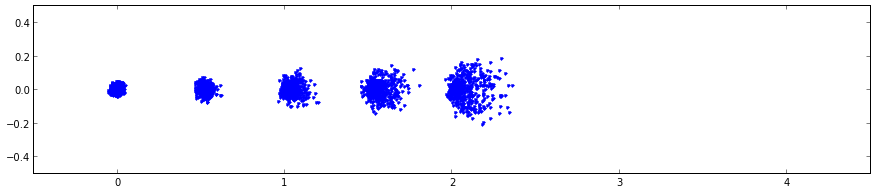

In [27]:
figure(1, figsize=[ 15, 3 ])
plot(-y,x,'.')
#a=axis()
#da=max(a[1]-a[0], a[3]-a[2])/2
#axis([(a[1]+a[0])/2-da, (a[1]+a[0])/2+da, (a[3]+a[2])/2-da, (a[3]+a[2])/2+da]);
axis([-0.5, 4.5, -0.5, 0.5]);